In [ ]:
!pip install keras-ocr
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 618.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import keras_ocr

import os
from glob import glob
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4'

In [ ]:
!ls '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images'

image100.jpg  image136.jpg  image171.jpg  image206.jpg	image241.jpg  image34.jpg  image6.jpg
image101.jpg  image137.jpg  image172.jpg  image207.jpg	image242.jpg  image35.jpg  image70.jpg
image102.jpg  image138.jpg  image173.jpg  image208.jpg	image243.jpg  image36.jpg  image71.jpg
image103.jpg  image139.jpg  image174.jpg  image209.jpg	image244.jpg  image37.jpg  image72.jpg
image104.jpg  image13.jpg   image175.jpg  image20.jpg	image245.jpg  image38.jpg  image73.jpg
image105.jpg  image140.jpg  image176.jpg  image210.jpg	image246.jpg  image39.jpg  image74.jpg
image106.jpg  image141.jpg  image177.jpg  image211.jpg	image247.jpg  image3.jpg   image75.jpg
image107.jpg  image142.jpg  image178.jpg  image212.jpg	image248.jpg  image40.jpg  image76.jpg
image108.jpg  image143.jpg  image179.jpg  image213.jpg	image249.jpg  image41.jpg  image77.jpg
image109.jpg  image144.jpg  image17.jpg   image214.jpg	image24.jpg   image42.jpg  image78.jpg
image10.jpg   image145.jpg  image180.jpg  image215.jpg	image25

In [ ]:
imgPaths = glob(dataset_path + '/images/*.jpg')
print(imgPaths)

['/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image48.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image96.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image97.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image53.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image91.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image122.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image80.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image126.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image61.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image70.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image116.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image12.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image29.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labelin

In [ ]:
# Function to perform OCR on an image using keras-ocr
def perform_ocr(image_path, pipeline):
    images = [keras_ocr.tools.read(image_path)]
    predictions = pipeline.recognize(images)
    return predictions

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

ocr_results = [] #list
# subset_img_paths = imgPaths[:5]
for imgPath in tqdm(imgPaths, desc='Medicine'):
    _, filename = os.path.split(imgPath)

    #inference ocr
    data = perform_ocr(imgPath, pipeline)

    #extract data and text to list
    text_results = []
    for text_result in data[0]:
      text = text_result[0]
      text_results.append({'id': filename, 'text': text})

    #append text results to the ocr results
    ocr_results.extend(text_results)

#export it to dataframe
allMedicine = pd.DataFrame(ocr_results)

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


Medicine:   0%|          | 0/132 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


Medicine:   1%|          | 1/132 [00:19<43:00, 19.70s/it]

1/1 [==============================] - 1s 829ms/step


Medicine:   2%|▏         | 2/132 [00:22<21:05,  9.73s/it]

4/4 [==============================] - 3s 427ms/step


Medicine:   2%|▏         | 3/132 [00:28<17:36,  8.19s/it]

2/2 [==============================] - 1s 889ms/step


Medicine:   3%|▎         | 4/132 [00:30<12:14,  5.74s/it]

1/1 [==============================] - 1s 1s/step


Medicine:   4%|▍         | 5/132 [00:32<09:13,  4.36s/it]

3/3 [==============================] - 1s 526ms/step


Medicine:   5%|▍         | 6/132 [00:34<07:37,  3.63s/it]

2/2 [==============================] - 1s 653ms/step


Medicine:   5%|▌         | 7/132 [00:36<06:24,  3.08s/it]

1/1 [==============================] - 1s 1s/step


Medicine:   6%|▌         | 8/132 [00:38<05:31,  2.67s/it]

2/2 [==============================] - 0s 31ms/step


Medicine:   7%|▋         | 9/132 [00:39<04:19,  2.11s/it]

2/2 [==============================] - 2s 2s/step


Medicine:   8%|▊         | 10/132 [00:41<04:27,  2.20s/it]

3/3 [==============================] - 0s 207ms/step


Medicine:   8%|▊         | 11/132 [00:43<03:52,  1.92s/it]

2/2 [==============================] - 1s 1s/step


Medicine:   9%|▉         | 12/132 [00:46<04:43,  2.36s/it]

2/2 [==============================] - 1s 1s/step


Medicine:  10%|▉         | 13/132 [00:50<05:29,  2.77s/it]

3/3 [==============================] - 0s 52ms/step


Medicine:  11%|█         | 14/132 [00:51<04:33,  2.32s/it]

2/2 [==============================] - 1s 952ms/step


Medicine:  11%|█▏        | 15/132 [00:53<04:14,  2.18s/it]

1/1 [==============================] - 0s 45ms/step


Medicine:  12%|█▏        | 16/132 [00:54<03:21,  1.74s/it]

1/1 [==============================] - 1s 1s/step


Medicine:  13%|█▎        | 17/132 [00:56<03:31,  1.84s/it]

2/2 [==============================] - 1s 1s/step


Medicine:  14%|█▎        | 18/132 [00:59<04:18,  2.27s/it]

1/1 [==============================] - 2s 2s/step


Medicine:  14%|█▍        | 19/132 [01:01<04:15,  2.26s/it]

1/1 [==============================] - 1s 1s/step


Medicine:  15%|█▌        | 20/132 [01:04<04:15,  2.28s/it]

2/2 [==============================] - 0s 37ms/step


Medicine:  16%|█▌        | 21/132 [01:05<03:30,  1.89s/it]

3/3 [==============================] - 0s 49ms/step


Medicine:  17%|█▋        | 22/132 [01:06<03:16,  1.78s/it]

1/1 [==============================] - 0s 111ms/step


Medicine:  17%|█▋        | 23/132 [01:07<02:48,  1.55s/it]

1/1 [==============================] - 0s 137ms/step


Medicine:  18%|█▊        | 24/132 [01:08<02:35,  1.44s/it]

5/5 [==============================] - 1s 233ms/step


Medicine:  19%|█▉        | 25/132 [01:11<03:18,  1.85s/it]

1/1 [==============================] - 0s 66ms/step


Medicine:  20%|█▉        | 26/132 [01:12<02:51,  1.61s/it]

3/3 [==============================] - 2s 764ms/step


Medicine:  20%|██        | 27/132 [01:16<03:46,  2.16s/it]

1/1 [==============================] - 1s 1s/step


Medicine:  21%|██        | 28/132 [01:18<03:39,  2.11s/it]

1/1 [==============================] - 1s 1s/step


Medicine:  22%|██▏       | 29/132 [01:20<03:33,  2.08s/it]

2/2 [==============================] - 1s 428ms/step


Medicine:  23%|██▎       | 30/132 [01:21<03:20,  1.97s/it]

3/3 [==============================] - 0s 59ms/step


Medicine:  23%|██▎       | 31/132 [01:23<03:02,  1.81s/it]

1/1 [==============================] - 1s 703ms/step


Medicine:  24%|██▍       | 32/132 [01:24<02:46,  1.67s/it]

9/9 [==============================] - 1s 55ms/step


Medicine:  25%|██▌       | 33/132 [01:26<02:57,  1.80s/it]

1/1 [==============================] - 0s 54ms/step


Medicine:  26%|██▌       | 34/132 [01:27<02:23,  1.47s/it]

1/1 [==============================] - 1s 614ms/step


Medicine:  27%|██▋       | 35/132 [01:28<02:15,  1.40s/it]

1/1 [==============================] - 0s 39ms/step


Medicine:  27%|██▋       | 36/132 [01:29<01:52,  1.18s/it]

1/1 [==============================] - 0s 39ms/step


Medicine:  28%|██▊       | 37/132 [01:29<01:37,  1.02s/it]

2/2 [==============================] - 2s 2s/step


Medicine:  29%|██▉       | 38/132 [01:32<02:14,  1.43s/it]

1/1 [==============================] - 0s 77ms/step


Medicine:  30%|██▉       | 39/132 [01:33<01:56,  1.25s/it]

2/2 [==============================] - 0s 39ms/step


Medicine:  30%|███       | 40/132 [01:34<01:56,  1.26s/it]

2/2 [==============================] - 0s 60ms/step


Medicine:  31%|███       | 41/132 [01:35<01:59,  1.31s/it]

4/4 [==============================] - 0s 138ms/step


Medicine:  32%|███▏      | 42/132 [01:37<02:13,  1.49s/it]

1/1 [==============================] - 0s 39ms/step


Medicine:  33%|███▎      | 43/132 [01:38<01:53,  1.27s/it]

1/1 [==============================] - 0s 56ms/step


Medicine:  33%|███▎      | 44/132 [01:39<01:44,  1.19s/it]

6/6 [==============================] - 0s 58ms/step


Medicine:  34%|███▍      | 45/132 [01:40<01:51,  1.28s/it]

1/1 [==============================] - 1s 804ms/step


Medicine:  35%|███▍      | 46/132 [01:42<02:01,  1.41s/it]

1/1 [==============================] - 0s 41ms/step


Medicine:  36%|███▌      | 47/132 [01:43<01:40,  1.18s/it]

1/1 [==============================] - 0s 60ms/step


Medicine:  36%|███▋      | 48/132 [01:44<01:27,  1.04s/it]

1/1 [==============================] - 0s 40ms/step


Medicine:  37%|███▋      | 49/132 [01:45<01:24,  1.01s/it]

1/1 [==============================] - 0s 62ms/step


Medicine:  38%|███▊      | 50/132 [01:45<01:15,  1.08it/s]

1/1 [==============================] - 0s 25ms/step


Medicine:  39%|███▊      | 51/132 [01:46<01:14,  1.09it/s]

1/1 [==============================] - 0s 60ms/step


Medicine:  39%|███▉      | 52/132 [01:47<01:08,  1.16it/s]

2/2 [==============================] - 0s 58ms/step


Medicine:  40%|████      | 53/132 [01:48<01:10,  1.12it/s]

1/1 [==============================] - 0s 57ms/step


Medicine:  41%|████      | 54/132 [01:49<01:14,  1.05it/s]

1/1 [==============================] - 0s 77ms/step


Medicine:  42%|████▏     | 55/132 [01:50<01:13,  1.05it/s]

2/2 [==============================] - 1s 483ms/step


Medicine:  42%|████▏     | 56/132 [01:51<01:25,  1.12s/it]

1/1 [==============================] - 0s 80ms/step


Medicine:  43%|████▎     | 57/132 [01:53<01:25,  1.14s/it]

1/1 [==============================] - 0s 44ms/step


Medicine:  44%|████▍     | 58/132 [01:53<01:16,  1.04s/it]

4/4 [==============================] - 0s 46ms/step


Medicine:  45%|████▍     | 59/132 [01:55<01:19,  1.09s/it]

1/1 [==============================] - 0s 36ms/step


Medicine:  45%|████▌     | 60/132 [01:55<01:09,  1.04it/s]

1/1 [==============================] - 0s 34ms/step


Medicine:  46%|████▌     | 61/132 [01:56<01:01,  1.16it/s]

1/1 [==============================] - 0s 66ms/step


Medicine:  47%|████▋     | 62/132 [01:57<00:57,  1.22it/s]

2/2 [==============================] - 1s 517ms/step


Medicine:  48%|████▊     | 63/132 [01:58<01:05,  1.05it/s]

2/2 [==============================] - 0s 25ms/step


Medicine:  48%|████▊     | 64/132 [01:59<01:02,  1.09it/s]

3/3 [==============================] - 0s 46ms/step


Medicine:  49%|████▉     | 65/132 [02:00<01:05,  1.02it/s]

1/1 [==============================] - 0s 55ms/step


Medicine:  50%|█████     | 66/132 [02:01<00:59,  1.12it/s]

1/1 [==============================] - 0s 60ms/step


Medicine:  51%|█████     | 67/132 [02:01<00:54,  1.19it/s]

1/1 [==============================] - 0s 53ms/step


Medicine:  52%|█████▏    | 68/132 [02:02<00:51,  1.25it/s]

3/3 [==============================] - 0s 41ms/step


Medicine:  52%|█████▏    | 69/132 [02:03<00:52,  1.20it/s]

1/1 [==============================] - 0s 51ms/step


Medicine:  53%|█████▎    | 70/132 [02:04<00:49,  1.26it/s]

1/1 [==============================] - 0s 81ms/step


Medicine:  54%|█████▍    | 71/132 [02:04<00:50,  1.21it/s]

1/1 [==============================] - 0s 51ms/step


Medicine:  55%|█████▍    | 72/132 [02:06<00:53,  1.12it/s]

1/1 [==============================] - 0s 414ms/step


Medicine:  55%|█████▌    | 73/132 [02:07<00:58,  1.01it/s]

1/1 [==============================] - 0s 73ms/step


Medicine:  56%|█████▌    | 74/132 [02:08<00:59,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


Medicine:  57%|█████▋    | 75/132 [02:09<01:00,  1.06s/it]

1/1 [==============================] - 0s 38ms/step


Medicine:  58%|█████▊    | 76/132 [02:10<00:53,  1.04it/s]

1/1 [==============================] - 0s 36ms/step


Medicine:  58%|█████▊    | 77/132 [02:10<00:47,  1.16it/s]

1/1 [==============================] - 0s 60ms/step


Medicine:  59%|█████▉    | 78/132 [02:11<00:44,  1.22it/s]

1/1 [==============================] - 0s 61ms/step


Medicine:  60%|█████▉    | 79/132 [02:12<00:42,  1.26it/s]

2/2 [==============================] - 0s 60ms/step


Medicine:  61%|██████    | 80/132 [02:13<00:43,  1.20it/s]

1/1 [==============================] - 0s 43ms/step


Medicine:  61%|██████▏   | 81/132 [02:13<00:40,  1.25it/s]

1/1 [==============================] - 0s 62ms/step


Medicine:  62%|██████▏   | 82/132 [02:14<00:43,  1.14it/s]

1/1 [==============================] - 0s 43ms/step


Medicine:  63%|██████▎   | 83/132 [02:15<00:40,  1.21it/s]

1/1 [==============================] - 0s 41ms/step


Medicine:  64%|██████▎   | 84/132 [02:16<00:37,  1.29it/s]

1/1 [==============================] - 0s 43ms/step


Medicine:  64%|██████▍   | 85/132 [02:17<00:35,  1.33it/s]

1/1 [==============================] - 0s 58ms/step


Medicine:  65%|██████▌   | 86/132 [02:17<00:33,  1.36it/s]

1/1 [==============================] - 0s 41ms/step


Medicine:  66%|██████▌   | 87/132 [02:18<00:32,  1.38it/s]

1/1 [==============================] - 0s 60ms/step


Medicine:  67%|██████▋   | 88/132 [02:19<00:31,  1.38it/s]

1/1 [==============================] - 0s 46ms/step


Medicine:  67%|██████▋   | 89/132 [02:19<00:30,  1.40it/s]

1/1 [==============================] - 0s 69ms/step


Medicine:  68%|██████▊   | 90/132 [02:20<00:34,  1.20it/s]

1/1 [==============================] - 0s 76ms/step


Medicine:  69%|██████▉   | 91/132 [02:21<00:34,  1.17it/s]

1/1 [==============================] - 2s 2s/step


Medicine:  70%|██████▉   | 92/132 [02:24<00:53,  1.35s/it]

1/1 [==============================] - 0s 87ms/step


Medicine:  70%|███████   | 93/132 [02:25<00:47,  1.22s/it]

1/1 [==============================] - 0s 44ms/step


Medicine:  71%|███████   | 94/132 [02:26<00:41,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


Medicine:  72%|███████▏  | 95/132 [02:26<00:35,  1.03it/s]

1/1 [==============================] - 0s 37ms/step


Medicine:  73%|███████▎  | 96/132 [02:27<00:34,  1.04it/s]

2/2 [==============================] - 0s 49ms/step


Medicine:  73%|███████▎  | 97/132 [02:28<00:32,  1.06it/s]

1/1 [==============================] - 0s 46ms/step


Medicine:  74%|███████▍  | 98/132 [02:29<00:29,  1.15it/s]

1/1 [==============================] - 0s 62ms/step


Medicine:  75%|███████▌  | 99/132 [02:30<00:27,  1.20it/s]

1/1 [==============================] - 0s 44ms/step


Medicine:  76%|███████▌  | 100/132 [02:30<00:25,  1.26it/s]

2/2 [==============================] - 0s 36ms/step


Medicine:  77%|███████▋  | 101/132 [02:31<00:25,  1.20it/s]

2/2 [==============================] - 0s 56ms/step


Medicine:  77%|███████▋  | 102/132 [02:32<00:25,  1.16it/s]

1/1 [==============================] - 0s 65ms/step


Medicine:  78%|███████▊  | 103/132 [02:33<00:24,  1.21it/s]

2/2 [==============================] - 0s 57ms/step


Medicine:  79%|███████▉  | 104/132 [02:34<00:24,  1.15it/s]

3/3 [==============================] - 0s 53ms/step


Medicine:  80%|███████▉  | 105/132 [02:35<00:24,  1.08it/s]

3/3 [==============================] - 0s 51ms/step


Medicine:  80%|████████  | 106/132 [02:37<00:33,  1.28s/it]

2/2 [==============================] - 0s 64ms/step


Medicine:  81%|████████  | 107/132 [02:38<00:33,  1.33s/it]

3/3 [==============================] - 0s 49ms/step


Medicine:  82%|████████▏ | 108/132 [02:40<00:34,  1.43s/it]

2/2 [==============================] - 0s 59ms/step


Medicine:  83%|████████▎ | 109/132 [02:41<00:32,  1.39s/it]

1/1 [==============================] - 0s 45ms/step


Medicine:  83%|████████▎ | 110/132 [02:42<00:26,  1.19s/it]

1/1 [==============================] - 0s 61ms/step


Medicine:  84%|████████▍ | 111/132 [02:43<00:22,  1.05s/it]

2/2 [==============================] - 0s 28ms/step


Medicine:  85%|████████▍ | 112/132 [02:44<00:19,  1.01it/s]

1/1 [==============================] - 0s 78ms/step


Medicine:  86%|████████▌ | 113/132 [02:44<00:17,  1.08it/s]

2/2 [==============================] - 0s 34ms/step


Medicine:  86%|████████▋ | 114/132 [02:45<00:16,  1.09it/s]

6/6 [==============================] - 0s 58ms/step


Medicine:  87%|████████▋ | 115/132 [02:47<00:20,  1.20s/it]

4/4 [==============================] - 0s 50ms/step


Medicine:  88%|████████▊ | 116/132 [02:48<00:19,  1.21s/it]

3/3 [==============================] - 0s 60ms/step


Medicine:  89%|████████▊ | 117/132 [02:50<00:17,  1.19s/it]

3/3 [==============================] - 0s 43ms/step


Medicine:  89%|████████▉ | 118/132 [02:51<00:15,  1.14s/it]

2/2 [==============================] - 0s 68ms/step


Medicine:  90%|█████████ | 119/132 [02:52<00:15,  1.22s/it]

2/2 [==============================] - 0s 37ms/step


Medicine:  91%|█████████ | 120/132 [02:53<00:15,  1.26s/it]

2/2 [==============================] - 0s 59ms/step


Medicine:  92%|█████████▏| 121/132 [02:55<00:14,  1.33s/it]

7/7 [==============================] - 0s 59ms/step


Medicine:  92%|█████████▏| 122/132 [02:57<00:16,  1.63s/it]

1/1 [==============================] - 0s 53ms/step


Medicine:  93%|█████████▎| 123/132 [02:58<00:12,  1.36s/it]

2/2 [==============================] - 0s 58ms/step


Medicine:  94%|█████████▍| 124/132 [02:59<00:09,  1.25s/it]

3/3 [==============================] - 0s 38ms/step


Medicine:  95%|█████████▍| 125/132 [03:00<00:08,  1.17s/it]

4/4 [==============================] - 0s 52ms/step


Medicine:  95%|█████████▌| 126/132 [03:01<00:07,  1.21s/it]

4/4 [==============================] - 0s 53ms/step


Medicine:  96%|█████████▌| 127/132 [03:02<00:06,  1.21s/it]

2/2 [==============================] - 0s 53ms/step


Medicine:  97%|█████████▋| 128/132 [03:03<00:04,  1.13s/it]

3/3 [==============================] - 0s 54ms/step


Medicine:  98%|█████████▊| 129/132 [03:04<00:03,  1.10s/it]

3/3 [==============================] - 0s 57ms/step


Medicine:  98%|█████████▊| 130/132 [03:06<00:02,  1.21s/it]

3/3 [==============================] - 0s 44ms/step


Medicine:  99%|█████████▉| 131/132 [03:07<00:01,  1.32s/it]

3/3 [==============================] - 0s 48ms/step


Medicine: 100%|██████████| 132/132 [03:09<00:00,  1.43s/it]


In [ ]:
allMedicine

NameError: ignored

In [ ]:
allMedicine.shape

(5722, 2)

In [ ]:
allMedicine.to_csv(f'{dataset_path}/data.csv', index=False)

Preprocessing

In [ ]:
import string
import re

In [ ]:
with open(f'{dataset_path}/data.txt',mode='r',encoding='utf8',errors='ignore') as f:
    text = f.read()

In [ ]:
data = list(map(lambda x:x.split('\t'),text.split('\n')))

In [ ]:
df = pd.DataFrame(data[1:],columns=data[0])

In [ ]:
df.head(10)

,id,text,tag
0,image1.jpg,sanmol,B-NAME
1,image1.jpg,forte,I-NAME
2,image1.jpg,paracetamol,B-ING
3,image1.jpg,tablet,B-TYPE
4,image1.jpg,penurun,B-DES
5,image1.jpg,panas,I-DES
6,image1.jpg,pereda,B-DES
7,image1.jpg,nyeri,I-DES
8,image1.jpg,isis,O
9,image1.jpg,4,O


Cleaning Text

In [ ]:
whitespace = string.whitespace
punctuation = "!#$%&\'()*+:;<=>?[\\]^`{|}~"
tableWhitespace = str.maketrans('','',whitespace)
tablePunctuation = str.maketrans('','',punctuation)
def cleanText(txt):
  text = str(txt)
  text = text.lower()
  removewhitespace = text.translate(tableWhitespace)
  removepunctuation = removewhitespace.translate(tablePunctuation)

  return str(removepunctuation)

In [ ]:
df['text'] = df['text'].apply(cleanText)

In [ ]:
dataClean = df.query("text != '' ")
dataClean.dropna(inplace=True)

In [ ]:
dataClean.head(10)

,id,text,tag
0,image1.jpg,sanmol,B-NAME
1,image1.jpg,forte,I-NAME
2,image1.jpg,paracetamol,B-ING
3,image1.jpg,tablet,B-TYPE
4,image1.jpg,penurun,B-DES
5,image1.jpg,panas,I-DES
6,image1.jpg,pereda,B-DES
7,image1.jpg,nyeri,I-DES
8,image1.jpg,isis,O
9,image1.jpg,4,O


#Training with TensorFlow

In [ ]:
grouped_data = dataClean.groupby('id').agg({'text': ' '.join, 'tag': list}).reset_index()
grouped_data

,id,text,tag
0,image1.jpg,sanmol forte paracetamol tablet penurun panas ...,"[B-NAME, I-NAME, B-ING, B-TYPE, B-DES, I-DES, ..."
1,image10.jpg,ptkalbe farma toe bekasi indonesia no dbl b511...,"[O, I-ORG, O, O, O, O, O, O, O, O, O, O, B-TYP..."
2,image100.jpg,hathhati procold flu bersamaan penggunaan deng...,"[O, B-NAME, I-NAME, O, O, O, O, O, O, O, O, O,..."
3,image101.jpg,gsk formula extra untuk sakit kepala panadol e...,"[O, B-DES, I-DES, I-DES, I-DES, I-DES, B-NAME,..."
4,image102.jpg,sanmol paracetamol penurun panas pereda nyeri ...,"[B-NAME, B-ING, B-DES, I-DES, B-DES, I-DES, B-..."
...,...,...,...
263,image95.jpg,sanmol paracetamol tablet penurun panas pereda...,"[B-NAME, B-ING, B-TYPE, B-DES, I-DES, B-DES, I..."
264,image96.jpg,procold fludbatuk paracetamol dextromethorphon...,"[B-NAME, I-NAME, B-ING, B-ING, I-ING, B-ING, I..."
265,image97.jpg,procold flu paracetamol phenylephrine hcl chlo...,"[B-NAME, I-NAME, B-ING, B-ING, I-ING, B-ING, I..."
266,image98.jpg,sanmol paracetamol tablet penurun panas pereda...,"[B-NAME, B-ING, B-TYPE, B-DES, I-DES, B-DES, I..."


In [ ]:
dataClean.shape

(10171, 3)

In [ ]:
ids = dataClean.id.unique()
len(ids)

268

In [ ]:
print("Number of unique words in the dataset: {}".format(dataClean.text.nunique()))
print("Number of unique tags in the dataset: {}".format(dataClean.tag.nunique()))

Number of unique words in the dataset: 3479
Number of unique tags in the dataset: 11


In [ ]:
tags = dataClean.tag.unique()
tags

array(['B-NAME', 'I-NAME', 'B-ING', 'B-TYPE', 'B-DES', 'I-DES', 'O',
       'B-ORG', 'I-ING', 'I-ORG', 'I-TYPE'], dtype=object)

In [ ]:
def num_words_tags(tags, data):
  tags_count = {}
  for tag in tags:
    len_tag = len(data[data['tag'] == tag])
    tags_count[tag] = len_tag
  return tags_count

In [ ]:
tags_count = num_words_tags(tags, dataClean)
tags_count

{'B-NAME': 638,
 'I-NAME': 381,
 'B-ING': 699,
 'B-TYPE': 360,
 'B-DES': 372,
 'I-DES': 911,
 'O': 5337,
 'B-ORG': 279,
 'I-ING': 755,
 'I-ORG': 108,
 'I-TYPE': 331}

In [ ]:
grouped_data.head()

,id,text,tag
0,image1.jpg,sanmol forte paracetamol tablet penurun panas ...,"[B-NAME, I-NAME, B-ING, B-TYPE, B-DES, I-DES, ..."
1,image10.jpg,ptkalbe farma toe bekasi indonesia no dbl b511...,"[O, I-ORG, O, O, O, O, O, O, O, O, O, O, B-TYP..."
2,image100.jpg,hathhati procold flu bersamaan penggunaan deng...,"[O, B-NAME, I-NAME, O, O, O, O, O, O, O, O, O,..."
3,image101.jpg,gsk formula extra untuk sakit kepala panadol e...,"[O, B-DES, I-DES, I-DES, I-DES, I-DES, B-NAME,..."
4,image102.jpg,sanmol paracetamol penurun panas pereda nyeri ...,"[B-NAME, B-ING, B-DES, I-DES, B-DES, I-DES, B-..."


In [ ]:
X = list(grouped_data['text'])
Y = list(grouped_data['tag'])

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
print("Number of examples: {}".format(len(X)))

Number of examples: 268


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [ ]:
word_index = tokenizer.word_index
print("Found {} unique tokens.".format(len(word_index)))
ind2word = dict([(value, key) for (key, value) in word_index.items()])

Found 3478 unique tokens.


In [ ]:
max_words = len(word_index)
maxlen = max(len(seq) for seq in sequences)

In [ ]:
word2id = word_index

In [ ]:
id2word = {}
for key, value in word2id.items():
  id2word[value] = key

In [ ]:
X_preprocessed = pad_sequences(sequences, padding='post')

In [ ]:
X_preprocessed[0]

array([ 73,  16,   6,   1, 102, 103,  66,  51, 401,  82,   1,  20,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
X_preprocessed[250]

array([   1,   15,    8,   63,  147,  148,  149,  150,   10,   67,    1,
         27,   36,   95,   42,  151,  624,   42, 3317, 3318,  649, 3319,
        282, 3320,    9,   17,   17,    9,  182, 3321,  209, 3322, 3323,
       3324,  252, 3325,  346, 3326,   96,    2,  570,    9,   31,  239,
       3327, 3328,  336, 3329,  141,  291, 3330,    3, 3331, 3332, 3333,
       3334,  214,  306, 3335,  110,  126,  345,  198, 3336,  155, 3337,
        236, 3338,  559, 3339,  235, 3340, 3341, 3342, 3343, 3344, 3345,
        364, 3346, 3347,  269, 3348, 3349,  547, 3350, 3351, 3352, 3353,
          5, 3354,  286,  260,  169,   64,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
tags2id = {}
for i, tag in enumerate(tags):
  tags2id[tag] = i

In [ ]:
tags2id

{'B-NAME': 0,
 'I-NAME': 1,
 'B-ING': 2,
 'B-TYPE': 3,
 'B-DES': 4,
 'I-DES': 5,
 'O': 6,
 'B-ORG': 7,
 'I-ING': 8,
 'I-ORG': 9,
 'I-TYPE': 10}

In [ ]:
id2tag = {}
for key, value in tags2id.items():
  id2tag[value] = key

In [ ]:
id2tag

{0: 'B-NAME',
 1: 'I-NAME',
 2: 'B-ING',
 3: 'B-TYPE',
 4: 'B-DES',
 5: 'I-DES',
 6: 'O',
 7: 'B-ORG',
 8: 'I-ING',
 9: 'I-ORG',
 10: 'I-TYPE'}

In [ ]:
def preprocess_tags(tags2id, Y):
  maxlen = max(len(y) for y in Y)
  Y_preprocessed = np.full((len(Y), maxlen), tags2id['O'], dtype=np.int32)

  for i, y in enumerate(Y):
    Y_place_holder = [tags2id[tag] for tag in y]
    len_new_tag_list = len(Y_place_holder)

    Y_place_holder = Y_place_holder[:maxlen]
    Y_preprocessed[i, :len_new_tag_list] = Y_place_holder

  return Y_preprocessed

In [ ]:
Y_preprocessed = preprocess_tags(tags2id, Y)
print(Y_preprocessed[0])

[0 1 2 3 4 5 4 5 6 6 3 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [ ]:
print(Y[0])

['B-NAME', 'I-NAME', 'B-ING', 'B-TYPE', 'B-DES', 'I-DES', 'B-DES', 'I-DES', 'O', 'O', 'B-TYPE', 'B-ORG']


In [ ]:
print("The Length of training examples: {}".format(len(X_preprocessed)))
print("The Length of training targets: {}".format(len(Y_preprocessed)))

The Length of training examples: 268
The Length of training targets: 268


In [ ]:
X_preprocessed = np.asarray(X_preprocessed)
Y_preprocessed = np.asarray(Y_preprocessed)

In [ ]:
training_samples = 0.7
validation_samples = 0.15
testing_samples = 0.15

In [ ]:
indices = np.arange(len(Y_preprocessed))

In [ ]:
np.random.seed(seed=123)
np.random.shuffle(indices)

In [ ]:
X_preprocessed = X_preprocessed[indices]
Y_preprocessed = Y_preprocessed[indices]

In [ ]:
X_train = X_preprocessed[: int(0.7 * len(X_preprocessed))]
print("Number of training examples: {}".format(len(X_train)))

X_val = X_preprocessed[int(0.7 * len(X_preprocessed)) : int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1)]
print("Number of validation examples: {}".format(len(X_val)))

X_test = X_preprocessed[int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1) : ]
print("Number of testing examples: {}".format(len(X_test)))

Y_train = Y_preprocessed[: int(0.7 * len(X_preprocessed))]
Y_val = Y_preprocessed[int(0.7 * len(X_preprocessed)) : int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1)]
Y_test = Y_preprocessed[int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1) : ]

print("Total number of examples after shuffling and splitting: {}".format(len(X_train) + len(X_val) + len(X_test)))

Number of training examples: 187
Number of validation examples: 41
Number of testing examples: 40
Total number of examples after shuffling and splitting: 268


In [ ]:
X_train[0]

array([957,   2, 958,   1,  46,  24,  47,  41, 959, 130, 108,  17, 464,
         9, 960,  54,  11, 113,  98,   3,   3,   1,  22,   2,  46,  24,
        47,  41, 961, 962, 963,  17,  11,   9, 131, 285,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
Y_train[0]

array([ 6,  6,  6,  3,  4,  5,  5,  5,  6,  6,  7,  6,  6,  6,  6,  0,  1,
        6,  6,  6,  6,  3, 10, 10,  4,  5,  5,  5,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6

In [ ]:
id2word[1]

'tablet'

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 32

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
maxlen = max(len(seq) for seq in sequences)
max_words = len(word_index)
num_tags = len(tags)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=200, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, activation='tanh', return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_tags, activation='softmax'))
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 272, 200)          695600    
                                                                 
 bidirectional_4 (Bidirecti  (None, 272, 100)          100400    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 272, 100)          60400     
 onal)                                                           
                                                                 
 time_distributed_2 (TimeDi  (None, 272, 11)           1111      
 stributed)                                                      
                                                                 
Total params: 857511 (3.27 MB)
Trainable params: 857511 (3.27 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train shape: (187, 272)
Y_train shape: (187, 272)


In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10
6/6 [==============================] - 1s 278ms/step - loss: 0.1898 - accuracy: 0.9419 - val_loss: 0.2223 - val_accuracy: 0.9364
Epoch 2/10
6/6 [==============================] - 1s 227ms/step - loss: 0.1856 - accuracy: 0.9430 - val_loss: 0.2204 - val_accuracy: 0.9362
Epoch 3/10
6/6 [==============================] - 2s 328ms/step - loss: 0.1810 - accuracy: 0.9441 - val_loss: 0.2178 - val_accuracy: 0.9366
Epoch 4/10
6/6 [==============================] - 1s 193ms/step - loss: 0.1764 - accuracy: 0.9451 - val_loss: 0.2146 - val_accuracy: 0.9379
Epoch 5/10
6/6 [==============================] - 1s 191ms/step - loss: 0.1718 - accuracy: 0.9460 - val_loss: 0.2117 - val_accuracy: 0.9388
Epoch 6/10
6/6 [==============================] - 1s 212ms/step - loss: 0.1673 - accuracy: 0.9470 - val_loss: 0.2096 - val_accuracy: 0.9387
Epoch 7/10
6/6 [==============================] - 0s 45ms/step - loss: 0.1631 - accuracy: 0.9477 - val_loss: 0.2076 - val_accuracy: 0.9389
Epoch 8/10
6/6 [=====

In [ ]:
model.evaluate(test_dataset)

2/2 [==============================] - 0s 27ms/step - loss: 0.1736 - accuracy: 0.9450


[0.17359615862369537, 0.945036768913269]

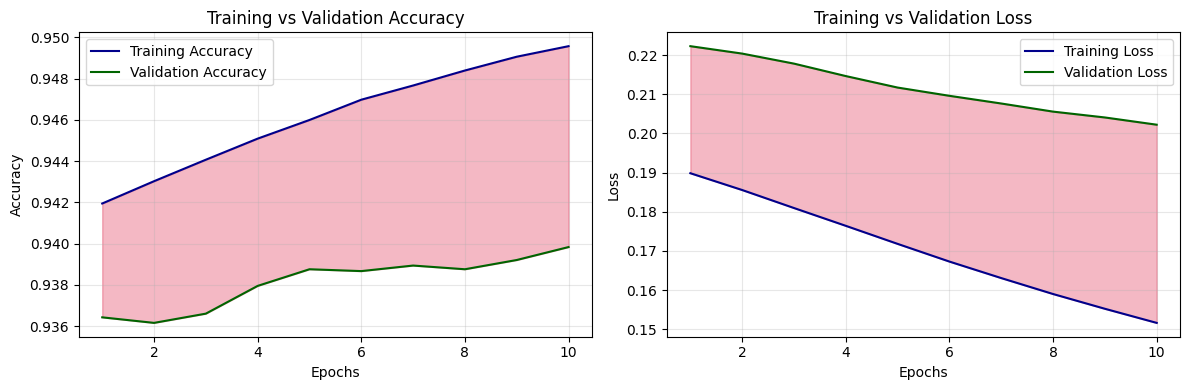

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label="Training Accuracy", color='darkblue')
plt.plot(epochs, history.history['val_accuracy'], label="Validation Accuracy", color='darkgreen')
plt.fill_between(epochs, history.history['accuracy'], history.history['val_accuracy'], color='crimson', alpha=0.3)
plt.grid(alpha=0.3)
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label="Training Loss", color='darkblue')
plt.plot(epochs, history.history['val_loss'], label="Validation Loss", color='darkgreen')
plt.fill_between(epochs, history.history['loss'], history.history['val_loss'], color='crimson', alpha=0.3)
plt.grid(alpha=0.3)
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save('ner.h5')

In [ ]:
def make_prediction(model, preprocessed_text, id2word, id2tag):
  preprocessed_text = preprocessed_text.reshape((1, 272))

  text = preprocessed_text[preprocessed_text > 0]
  word_list = []
  for word in list(text):
    word_list.append(id2word[word])
  original_text = ' '.join(word_list)

  len_original_text = len(word_list)

  prediction = model.predict(preprocessed_text)
  prediction = np.argmax(prediction[0], axis=1)

  prediction = list(prediction)[ : len_original_text]

  pred_tag_list = []
  for tag_id in prediction:
    pred_tag_list.append(id2tag[tag_id])

  return original_text, pred_tag_list

In [ ]:
print("Original shape of preprocessed_text:", X_test[5].shape)
print("Size of preprocessed_text:", X_test[5].size)

Original shape of preprocessed_text: (272,)
Size of preprocessed_text: 272


In [ ]:
original_text, pred_tag_list = make_prediction(model=model, preprocessed_text=X_test[20], id2word=id2word, id2tag=id2tag)

1/1 [==============================] - 0s 32ms/step


In [ ]:
print(original_text)

procold fludbatuk paracetamol dextromethorphon hbr phenylephrine hcl s e meringankan gejala flu disertai batuk tidak berdahak


In [ ]:
print(pred_tag_list)

['I-ING', 'I-ING', 'I-ING', 'I-ING', 'I-ING', 'I-ING', 'I-DES', 'I-DES', 'I-DES', 'I-DES', 'I-DES', 'I-DES', 'I-DES', 'I-DES', 'I-DES', 'I-DES']
